<a href="https://colab.research.google.com/github/RewinaB/Deep-Learning-Projects/blob/main/employee_success_modeling_and_SHAP_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q xgboost scikit-learn pandas matplotlib seaborn


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Load the datasets
train_df = pd.read_csv('/content/train_dataset.csv')
test_df = pd.read_csv('/content/test_dataset.csv')

In [6]:
print(train_df.columns)


Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'month',
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_finishing ', 'department_sweing', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'actual_productivity'],
      dtype='object')


* day : Day of the Week
* quarter : A portion of the month. A month was divided into four quarters
* department : Associated department with the instance
* team_no : Associated team number with the instance
* no_of_workers : Number of workers in each team
* no_of_style_change : Number of changes in the style of a particular product
* targeted_productivity : Targeted productivity set by the Authority for each team for each day.
* smv : Standard Minute Value, it is the allocated time for a task
* wip : Work in progress. Includes the number of unfinished items for products
* over_time : Represents the amount of overtime by each team in minutes
* incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
* idle_time : The amount of time when the production was interrupted due to several reasons
* idle_men : The number of workers who were idle due to production interruption
* actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.

In [7]:
# Drop duplicate or redundant columns
train_df = train_df.loc[:, ~train_df.columns.duplicated()]
test_df = test_df.loc[:, ~test_df.columns.duplicated()]

# Handle missing values (e.g., fill 'wip' column with mean)
train_df['wip'] = train_df['wip'].fillna(train_df['wip'].mean())
test_df['wip'] = test_df['wip'].fillna(test_df['wip'].mean())


In [8]:
train_df.columns = train_df.columns.str.strip()  # Remove leading/trailing spaces


In [9]:
# Split features and target
X = train_df.drop(columns=['actual_productivity'])
y = train_df['actual_productivity']

In [10]:
# Split into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)
preds_lr = lr.predict(X_valid)
rmse_lr = np.sqrt(mean_squared_error(y_valid, preds_lr))
r2_lr = r2_score(y_valid, preds_lr)
print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression R2:", r2_lr)


Linear Regression RMSE: 0.16815462377991192
Linear Regression R2: 0.14856868598183404


In [12]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
preds_rf = rf.predict(X_valid)
rmse_rf = np.sqrt(mean_squared_error(y_valid, preds_rf))
r2_rf = r2_score(y_valid, preds_rf)
print("Random Forest RMSE:", rmse_rf)
print("Random Forest R2:", r2_rf)


Random Forest RMSE: 0.1523150949057686
Random Forest R2: 0.30141721035664193


In [16]:
# For XGboost: Strip and clean column names
X_train.columns = X_train.columns.str.strip()
X_valid.columns = X_valid.columns.str.strip()

# Check for duplicate column names and remove one if found
print("Columns before removing duplicates:", X_train.columns.tolist())
X_train = X_train.loc[:,~X_train.columns.duplicated()]
X_valid = X_valid.loc[:,~X_valid.columns.duplicated()]
print("Columns after removing duplicates:", X_train.columns.tolist())


#2: Check for object or categorical types
print(X_train.dtypes)

#3: Encode non-numeric columns (label encoding for simplicity)
from sklearn.preprocessing import LabelEncoder

for col in X_train.columns:
    if X_train[col].dtype == 'object':
        le = LabelEncoder()
        combined = pd.concat([X_train[col], X_valid[col]], axis=0)
        le.fit(combined.astype(str))
        X_train[col] = le.transform(X_train[col].astype(str))
        X_valid[col] = le.transform(X_valid[col].astype(str))

Columns before removing duplicates: ['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'month', 'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing', 'department_finishing', 'department_sweing', 'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday']
Columns after removing duplicates: ['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'month', 'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing', 'department_sweing', 'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday']
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_

In [17]:
xgb = XGBRegressor(n_estimators=50, verbosity=0, random_state=42)
xgb.fit(X_train, y_train)
preds_xgb = xgb.predict(X_valid)
rmse_xgb = np.sqrt(mean_squared_error(y_valid, preds_xgb))
r2_xgb = r2_score(y_valid, preds_xgb)
print("XGBoost RMSE:", rmse_xgb)
print("XGBoost R2:", r2_xgb)


XGBoost RMSE: 0.1556665074867689
XGBoost R2: 0.27033694907286265


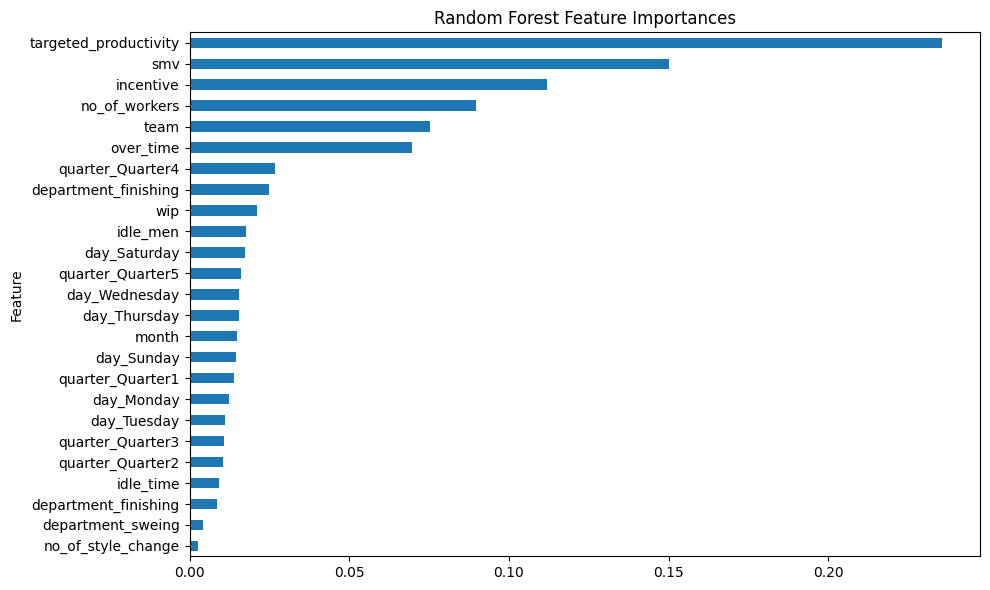

In [18]:
importances = rf.feature_importances_
feat_names = X.columns
feat_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
feat_df.sort_values(by='Importance', ascending=True).plot(kind='barh', x='Feature', y='Importance', figsize=(10, 6), legend=False)
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()


Model	RMSE ↓	R² ↑	Interpretation
* Random Forest	0.1523	0.3014	Best performance — lowest prediction error and explains ~30% of the variance in productivity
* XGBoost	0.1557	0.2703	Slightly worse than RF — still quite solid, more regularized
* Linear Regression	0.1682	0.1486	Worst performer — explains only ~15% of the variance; likely underfitting non-linear patterns





Random Forest outperformed both XGBoost and Linear Regression on both RMSE and R².

It captured more of the variance in the productivity scores, likely because of its ability to model non-linear relationships and feature interactions.

XGBoost, although slightly behind RF here, is often better in scenarios with more complex features, more training data, or better-tuned hyperparameters.

Linear Regression is a useful baseline, but it's too simple for this task. Employee productivity is influenced by complex interactions that a linear model can’t capture.

**HYPERPARAMETER TUNE XGBOOST**

In [20]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor, plot_importance
import matplotlib.pyplot as plt
import shap

In [22]:
# 1. Hyperparameter tuning for XGBoost ---
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 3]
}
xgb = XGBRegressor(random_state=42, verbosity=0)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='r2', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_xgb = grid_search.best_estimator_



Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [23]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict using the best XGBoost model from GridSearch
y_pred_best = best_xgb.predict(X_valid)

# Calculate RMSE and R² on validation set
rmse_best = np.sqrt(mean_squared_error(y_valid, y_pred_best))
r2_best = r2_score(y_valid, y_pred_best)

rmse_best, r2_best


(np.float64(0.14390076177051914), 0.37646881749500494)

/tmp/ipython-input-24-2151041047.py:5: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

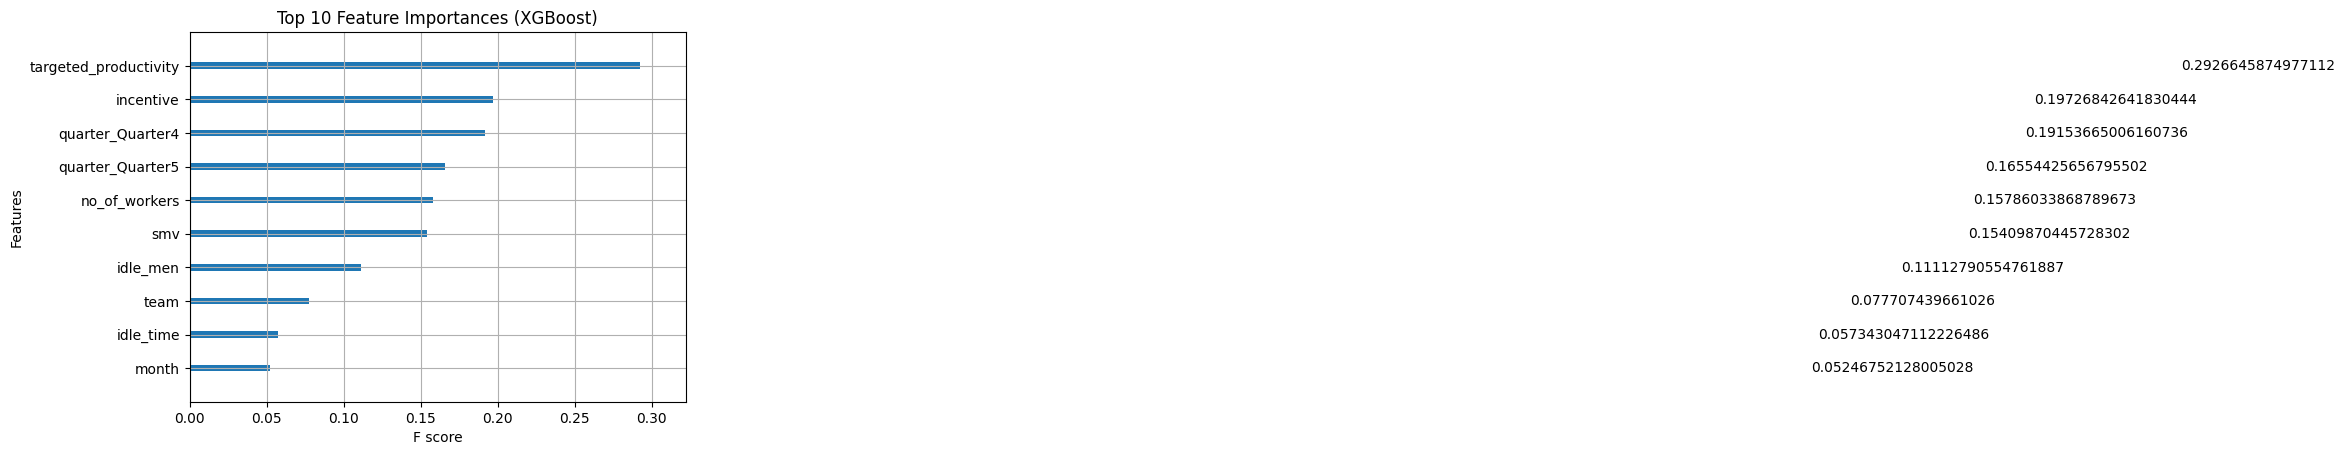

In [24]:
# --- 2. Feature Importance Plot ---
plt.figure(figsize=(10, 6))
plot_importance(best_xgb, importance_type='gain', max_num_features=10)
plt.title("Top 10 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()

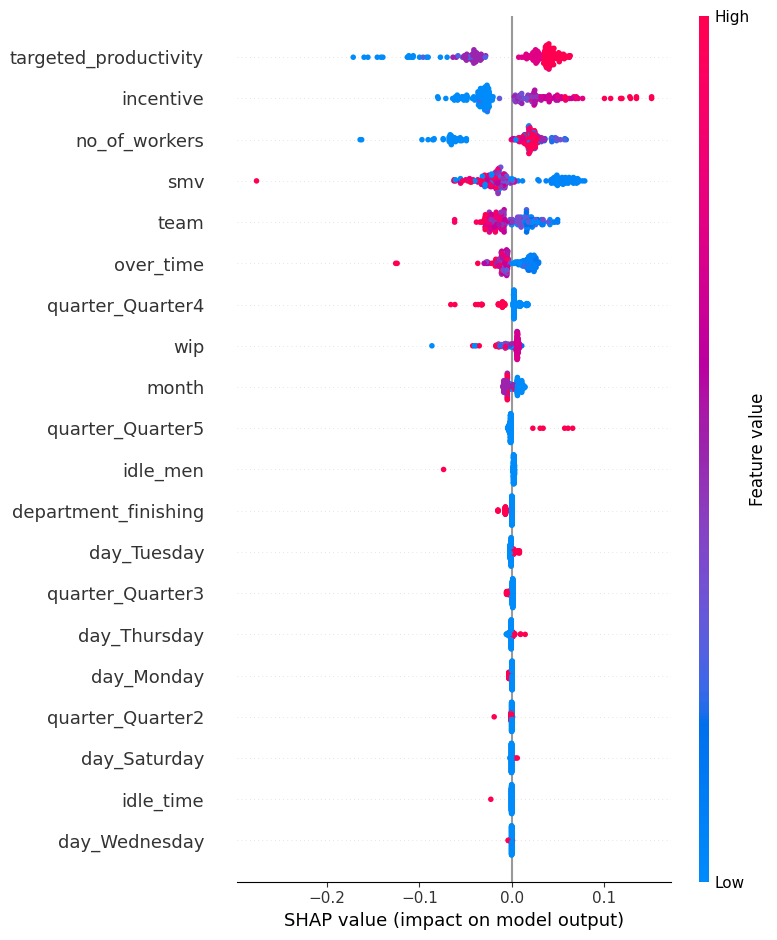

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 100}

In [25]:
# --- 3. SHAP Analysis ---
explainer = shap.Explainer(best_xgb)
shap_values = explainer(X_valid)
shap.summary_plot(shap_values, X_valid)

# Output best parameters
grid_search.best_params_

* targeted_productivity is the strongest predictor.

High values (red) push predicted productivity up.

Low values (blue) tend to lower predicted productivity.

This aligns with expectations: if targets are higher, so might be actual productivity due to goal alignment or stretch motivation.

* incentive and no_of_workers are highly influential.

Higher incentive levels (red) typically increase predicted productivity.

Larger teams (no_of_workers) seem to boost performance, possibly due to division of labor or efficiency.

* smv (Standard Minute Value) shows nonlinear influence.

Indicates task complexity. High smv values slightly increase productivity only in certain contexts (red pushing right), but often not influential.

* Team-level effects and over_time:

Specific teams and more overtime contribute positively, as seen in team and over_time.

* wip (Work in Progress):

Appears to have mixed effects — too much WIP might clutter workspaces or overwhelm workers.